# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
Since the provided data was is not clean, we will need to fill in missing data, remove unnecessary columns and unusable data entries,

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import datetime
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
import io

from math import sqrt
import pickle
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data/vehicles.csv")
df.tail()

df.describe()

id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [6]:
#Distribution of cyclinder
df["cylinders"].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [7]:
df['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

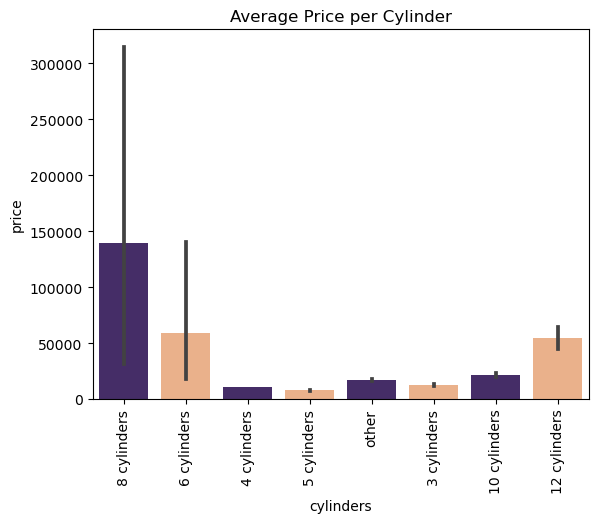

In [8]:
#Plot graphs for various columns vs price to visualize the correlation
plt.title('Average Price per Cylinder')
sns.barplot(data=df, x='cylinders', y='price', palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)
plt.show()

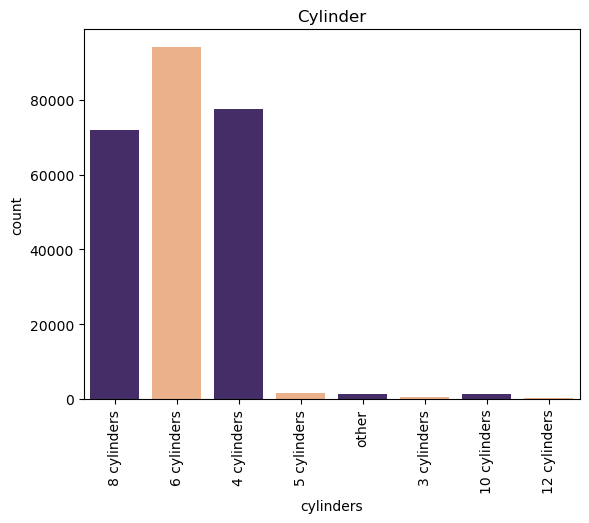

In [9]:
#Plot countplot for cyclinders
plt.title('Cylinder')
sns.countplot(data=df, x='cylinders', palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)
plt.show()

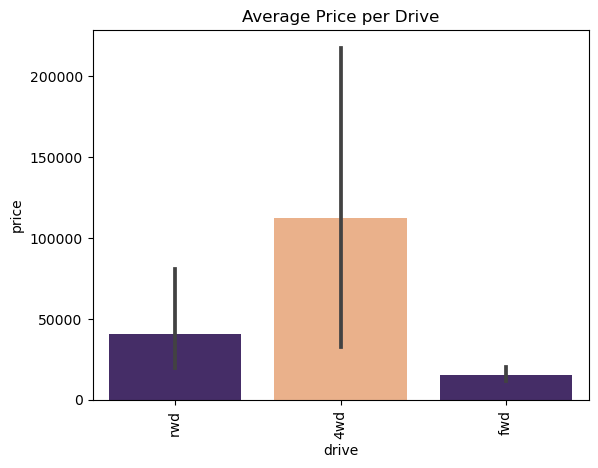

In [11]:
#Plot graphs for various columns vs price to visualize the correlation
plt.title('Average Price per Drive')
sns.barplot(data=df, x='drive', y='price', palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)
plt.show()

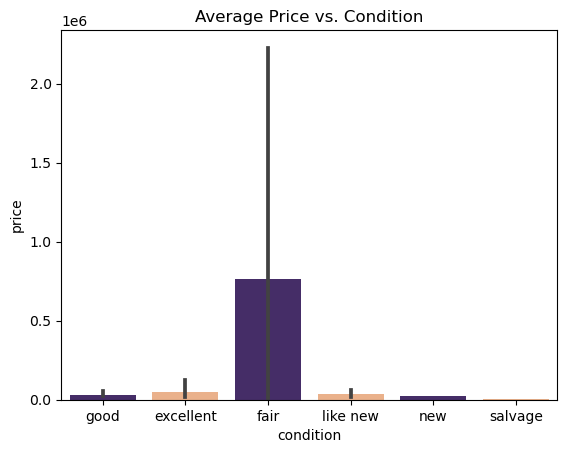

In [12]:
plt.title('Average Price vs. Condition')
sns.barplot(data=df, x='condition', y='price', palette=['#432371',"#FAAE7B"])
plt.show()

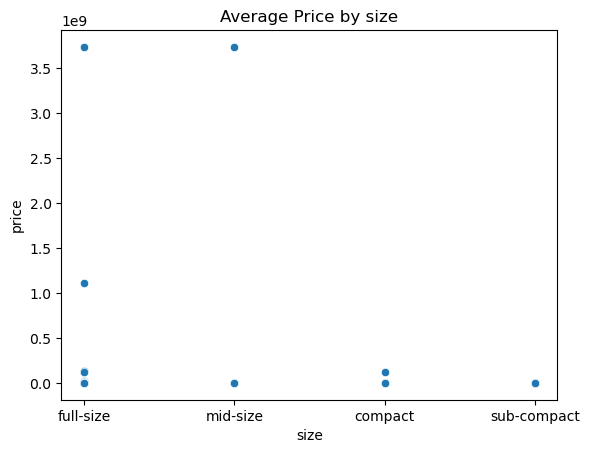

In [13]:
plt.title('Average Price by size')
sns.scatterplot(data=df, x='size', y='price', palette=['#432371',"#FAAE7B"])
plt.show()

In [14]:
# Check unique values in each column
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

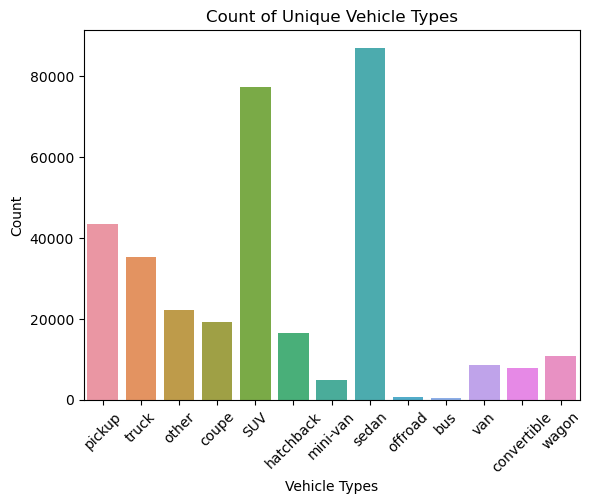

In [15]:
fig = sns.countplot(x="type", data=df)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.xlabel("Vehicle Types")
plt.ylabel("Count")
plt.title("Count of Unique Vehicle Types")

plt.savefig('images/v_typesx.png')
plt.show()

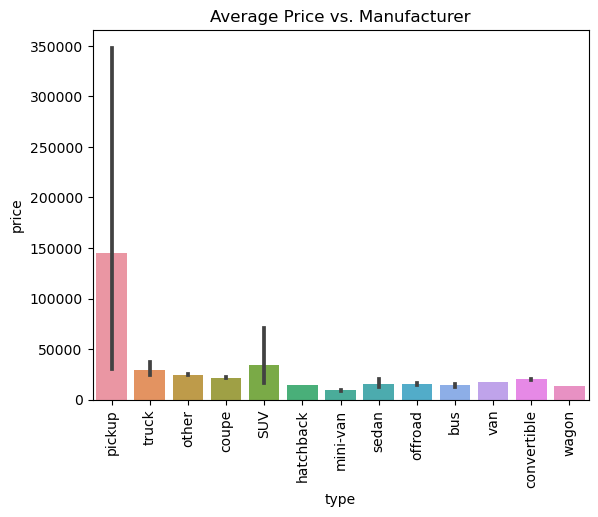

In [16]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=df, x='type', y='price')
plt.xticks(rotation=90)
plt.show()

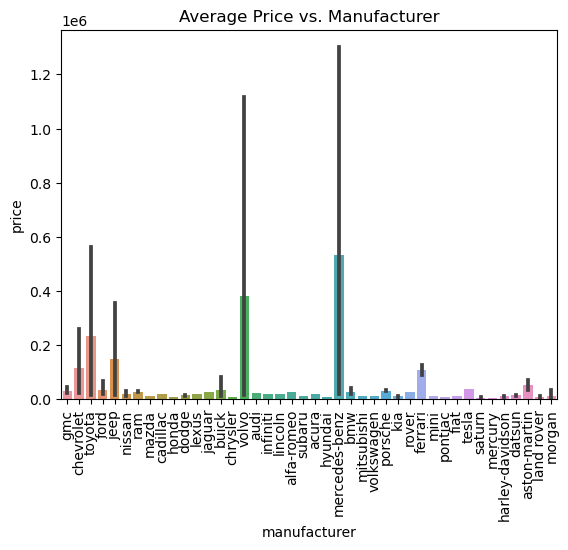

In [17]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

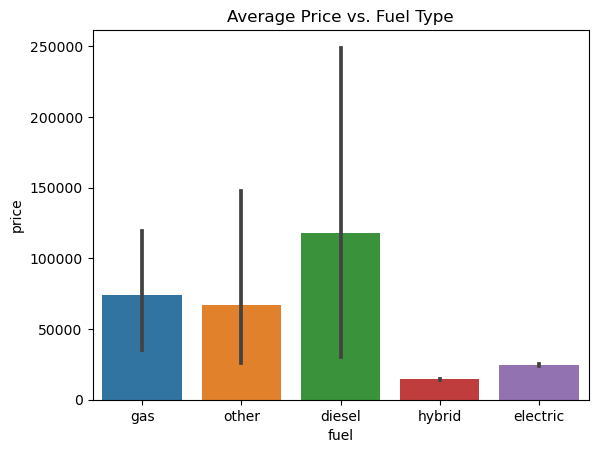

In [21]:
plt.title('Average Price vs. Fuel Type')
sns.barplot(data=df, x='fuel', y='price')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Year of used cars')]

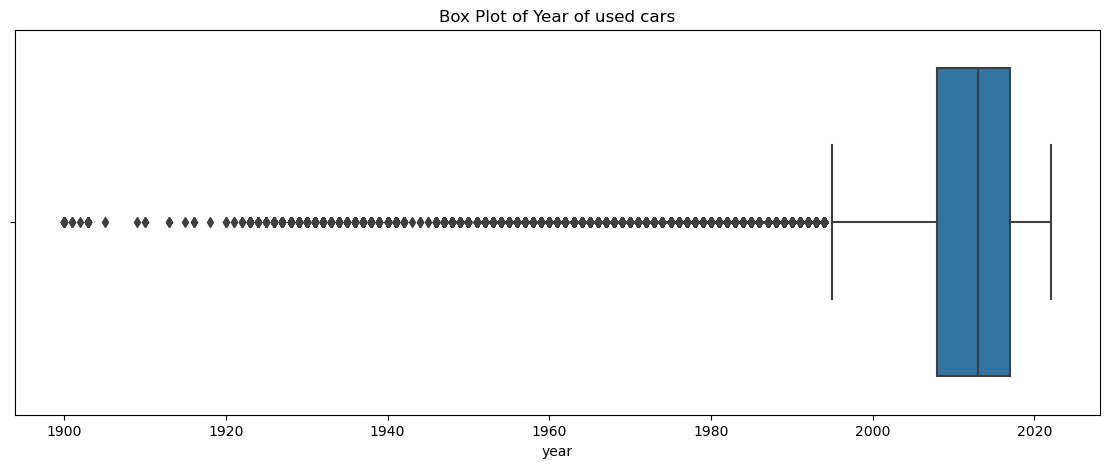

In [23]:
#box plot of 'year' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='year').set(title="Box Plot of Year of used cars")

[Text(0.5, 1.0, 'Box Plot of Odometer')]

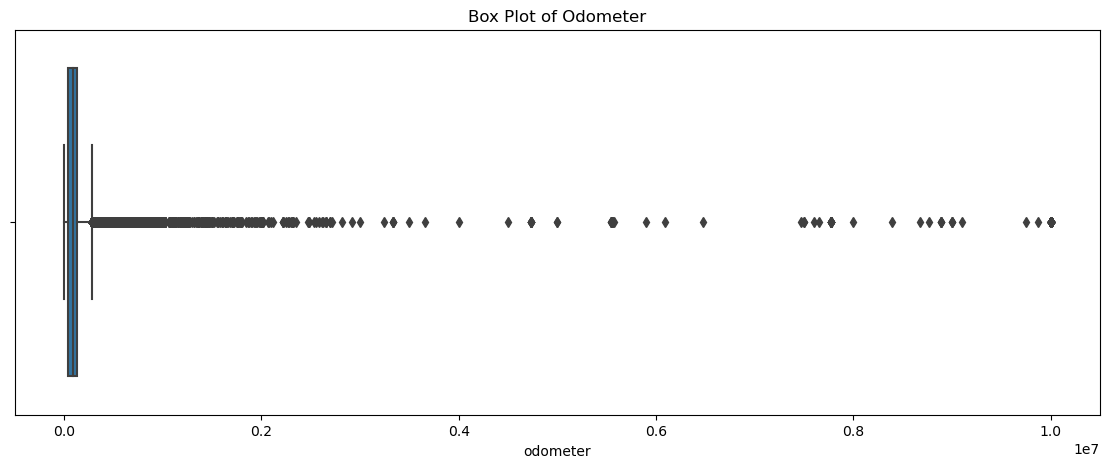

In [24]:
#box plot of 'Odometer' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='odometer').set(title="Box Plot of Odometer")

In [25]:
#Explore the object features
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

From the initial analysis of the dataset , here are some of the observations seen that affect the car prices:

There is a negative correlation between price and distance travelled ( odometer) in the car, the lower the range the higher the price.

However Mercedes,Volvo, Toyota and Jeep are sold at a drastically higher price as compared the other models.

8 and 4 and 6 cyclinder cars are most popular , with 8 cyclinders being much more expensive that the others.

Diesel cars are more expensive compared to gas cars. However, gas cars are hands down the most sold in the inventory than diesel or electric.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Data cleaning methods applied to the cars dataset

Replace Nan values
Remove any duplicates
Drop columns
Drop na values
Convert the year column into the age of the car Drop the columns unused for machine learning

Dropping Features
VIN and id are not relevant in determining car prices. Therefore, these features can be safely dropped.

In [60]:
# Dropping ID and VIN since it does not affect car prices, also dropping the state and region from the analysis.
data_df = df.drop(columns=['id', 'model', 'VIN', 'state','size','region'], axis=1)
data_df.reset_index(inplace=True, drop = True)
data_df

price    year manufacturer condition    cylinders    fuel  odometer  \
0        6000     NaN          NaN       NaN          NaN     NaN       NaN   
1       11900     NaN          NaN       NaN          NaN     NaN       NaN   
2       21000     NaN          NaN       NaN          NaN     NaN       NaN   
3        1500     NaN          NaN       NaN          NaN     NaN       NaN   
4        4900     NaN          NaN       NaN          NaN     NaN       NaN   
...       ...     ...          ...       ...          ...     ...       ...   
426875  23590  2019.0       nissan      good  6 cylinders     gas   32226.0   
426876  30590  2020.0        volvo      good          NaN     gas   12029.0   
426877  34990  2020.0     cadillac      good          NaN  diesel    4174.0   
426878  28990  2018.0        lexus      good  6 cylinders     gas   30112.0   
426879  30590  2019.0          bmw      good          NaN     gas   22716.0   

       title_status transmission drive       type paint_color  
0               NaN          NaN   NaN        NaN         NaN  
1               NaN          NaN   NaN        NaN         NaN  
2               NaN          NaN   NaN        NaN         NaN  
3               NaN          NaN   NaN        NaN         NaN  
4               NaN          NaN   NaN        NaN         NaN  
...             ...          ...   ...        ...         ...  
426875        clean        other   fwd      sedan         NaN  
426876        clean        other   fwd      sedan         red  
426877        clean        other   NaN  hatchback       white  
426878        clean        other   fwd      sedan      silver  
426879        clean        other   rwd      coupe         NaN  

[426880 rows x 12 columns]

In [61]:
# Dropping rows with null values
data_df = data_df.dropna()

In [62]:
# convert the year column into the age column (2021 because that was when the dataset was released) 
current_year = 2022
data_df['age'] = current_year - data_df['year']
data_df.drop(columns = ['year'], inplace = True)

# drop unnecessary columns
data_df

price manufacturer  condition    cylinders fuel  odometer  \
31      15000         ford  excellent  6 cylinders  gas  128000.0   
32      27990          gmc       good  8 cylinders  gas   68696.0   
33      34590    chevrolet       good  6 cylinders  gas   29499.0   
34      35000       toyota  excellent  6 cylinders  gas   43000.0   
35      29990    chevrolet       good  6 cylinders  gas   17302.0   
...       ...          ...        ...          ...  ...       ...   
426859  48590     cadillac       good  6 cylinders  gas    7701.0   
426860  39990     infiniti       good  8 cylinders  gas   41664.0   
426866  32990     infiniti       good  8 cylinders  gas   55612.0   
426874  33590        lexus       good  6 cylinders  gas   30814.0   
426878  28990        lexus       good  6 cylinders  gas   30112.0   

       title_status transmission drive    type paint_color   age  
31            clean    automatic   rwd   truck       black   9.0  
32            clean        other   4wd  pickup       black  10.0  
33            clean        other   4wd  pickup      silver   6.0  
34            clean    automatic   4wd   truck        grey   3.0  
35            clean        other   4wd  pickup         red   6.0  
...             ...          ...   ...     ...         ...   ...  
426859        clean        other   fwd   other       black   2.0  
426860        clean    automatic   4wd   other       black   5.0  
426866        clean    automatic   rwd   other       black   6.0  
426874        clean    automatic   rwd   sedan       white   4.0  
426878        clean        other   fwd   sedan      silver   4.0  

[117169 rows x 12 columns]

In [63]:
map_condition = {'new': 5, 'like new': 4, 'excellent': 3, 'good' : 2, 'fair' : 1, 'salvage': 0}
map_cylinders = {'12 cylinders' : 12, '10 cylinders' : 10, '8 cylinders' : 8, '6 cylinders' : 6, '5 cylinders' : 5, '4 cylinders' : 4, '3 cylinders' : 3, 'other': 1}


In [64]:
data_df['condition'] = data_df['condition'].map(map_condition)

In [65]:
data_df['cylinders'] = data_df['cylinders'].map(map_cylinders)


In [66]:
# Filter out car price equal to 0
data_df = data_df[data_df['price'] != 0]

In [67]:
ohe_features = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

df_final = pd.get_dummies(data_df, columns=ohe_features)

In [68]:
df_final


price  condition  cylinders  odometer   age  manufacturer_acura  \
31      15000          3          6  128000.0   9.0               False   
32      27990          2          8   68696.0  10.0               False   
33      34590          2          6   29499.0   6.0               False   
34      35000          3          6   43000.0   3.0               False   
35      29990          2          6   17302.0   6.0               False   
...       ...        ...        ...       ...   ...                 ...   
426859  48590          2          6    7701.0   2.0               False   
426860  39990          2          8   41664.0   5.0               False   
426866  32990          2          8   55612.0   6.0               False   
426874  33590          2          6   30814.0   4.0               False   
426878  28990          2          6   30112.0   4.0               False   

        manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
31                        False                      False              False   
32                        False                      False              False   
33                        False                      False              False   
34                        False                      False              False   
35                        False                      False              False   
...                         ...                        ...                ...   
426859                    False                      False              False   
426860                    False                      False              False   
426866                    False                      False              False   
426874                    False                      False              False   
426878                    False                      False              False   

        manufacturer_bmw  ...  paint_color_brown  paint_color_custom  \
31                 False  ...              False               False   
32                 False  ...              False               False   
33                 False  ...              False               False   
34                 False  ...              False               False   
35                 False  ...              False               False   
...                  ...  ...                ...                 ...   
426859             False  ...              False               False   
426860             False  ...              False               False   
426866             False  ...              False               False   
426874             False  ...              False               False   
426878             False  ...              False               False   

        paint_color_green  paint_color_grey  paint_color_orange  \
31                  False             False               False   
32                  False             False               False   
33                  False             False               False   
34                  False              True               False   
35                  False             False               False   
...                   ...               ...                 ...   
426859              False             False               False   
426860              False             False               False   
426866              False             False               False   
426874              False             False               False   
426878              False             False               False   

        paint_color_purple  paint_color_red  paint_color_silver  \
31                   False            False               False   
32                   False            False               False   
33                   False            False                True   
34                   False            False               False   
35                   False             True               False   
...                    ...              ...                 ..

In [69]:
df_final.isna().sum()/df_final.shape[0]*100

price                 0.0
condition             0.0
cylinders             0.0
odometer              0.0
age                   0.0
                     ... 
paint_color_purple    0.0
paint_color_red       0.0
paint_color_silver    0.0
paint_color_white     0.0
paint_color_yellow    0.0
Length: 89, dtype: float64

We look at the min, median, and max values for each respective feature and explore the lower bound and upper bounds using IQR.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In this section, we will be building three models to compare and use the best model to get the feature importance for used car prices.

Linear Regression
Lasso Regression with GridSearchCV
Ridge Regression with GridSearchCV

In [70]:
X = df_final.drop(columns = ['price'])
y = df_final['price']
    

#split the dataset into training set and test set
# Applying log transformation to target variable to reduce skewness
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), random_state = 42, shuffle=True);

In [71]:
X_train


condition  cylinders  odometer   age  manufacturer_acura  \
1093            2          6  186500.0  27.0               False   
78392           3          8   84277.0  11.0               False   
159563          2          4   48535.0   7.0               False   
275300          3          4   31444.0  14.0               False   
229763          3          6   50100.0   6.0               False   
...           ...        ...       ...   ...                 ...   
285403          2          4  105099.0   9.0               False   
418593          3          4   68319.0  10.0               False   
388539          3          6   64329.0  12.0               False   
3669            4          6  147909.0  12.0               False   
64713           3          4   65000.0   6.0               False   

        manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
1093                      False                      False              False   
78392                     False                      False              False   
159563                    False                      False              False   
275300                    False                      False              False   
229763                    False                      False              False   
...                         ...                        ...                ...   
285403                    False                      False              False   
418593                    False                      False              False   
388539                    False                      False              False   
3669                      False                      False              False   
64713                     False                      False              False   

        manufacturer_bmw  manufacturer_buick  ...  paint_color_brown  \
1093               False               False  ...              False   
78392              False               False  ...              False   
159563              True               False  ...              False   
275300             False               False  ...              False   
229763             False               False  ...              False   
...                  ...                 ...  ...                ...   
285403             False               False  ...              False   
418593             False               False  ...              False   
388539             False               False  ...              False   
3669               False               False  ...              False   
64713              False               False  ...              False   

        paint_color_custom  paint_color_green  paint_color_grey  \
1093                 False              False             False   
78392                False              False             False   
159563               False              False             False   
275300               False              False             False   
229763               False              False             False   
...                    ...                ...               ...   
285403               False              False              True   
418593               False              False             False   
388539               False              False             False   
3669                 False              False             False   
64713                False              False             False   

        paint_color_orange  paint_color_purple  paint_color_red  \
1093                 False               False             True   
78392                False               False            False   
159563               False               False            False   
275300                True               False            False   
229763               False               False            False   
...                    ...                 ...              ...   
285403               False               False            False   
418593      

In [72]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)


#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
print(linear_coefs)  

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
[ 1.41671758e-01  1.68123049e-02 -1.12170314e-01 -2.77853907e-01
  8.19045296e+09  1.65117957e+09  6.07100520e+08  8.10635657e+09
  1.30607713e+10  9.21101535e+09  9.66604465e+09  2.84074416e+10
  1.02220446e+10  1.05146679e+09  1.48029855e+10  9.78873884e+08
  2.97215066e+09  3.02259311e+10  1.56602428e+10  1.46188424e+09
  1.83140694e+10  1.16771647e+10  8.82910199e+09  4.59985529e+09
  1.71941942e+10  1.01380848e+10  7.18322531e+08  1.08033212e+10
  7.81613442e+09  8.56871675e+09  1.24481559e+10  5.19715522e+09
  5.28083548e+09  6.99483464e+09  2.71510025e+08  1.77929633e+10
  7.18407723e+09  4.36287216e+09  1.48076015e+10  5.20418089e+09
  4.81747353e+09  1.20912389e+10  1.60595215e+09  2.21621100e+10
  1.11959487e+10  6.62153746e+09  7.12802740e+08  1.28275579e+08
  8.63770732e+08  3.30280209e+08  3.84075174e+08  3.98467551e+10
  1.54291305e+10  7.59353808e+09  3.68895694e+09  3.06152421e+10
  1.9861268

The Linear Regression model does not perform well for this dataset with the score of 38% which is very low. Also the value returned for Test MSE is extremely high so we cannot rely on this model to determine the features affecting the used car prices.

In [ ]:
Lasso Regression

In [ ]:
#We now try using lasso to offer a penalized regression method

# Specifying alpha values to try out when using GridSearchCV
# Had to adjust values since I noticed that when alpha value was set too high, every coefficient value became zero
# Intially used same values used in ridge model (0, 5, 50)
#lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}
lasso_param_dict = {'lasso__alpha':[0.01, 0.1, 1,10]}

# create a two step pipeline where the first step involves standardizing the data followed by perform lasso regression
Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                       ('lasso', Lasso())])

# Using GridSearchCV to find the optimal value for alpha in the Lasso regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
#Perform polynomial regression on the data
lasso_grid = GridSearchCV(Lasso3_pipe, param_grid = lasso_param_dict, cv = 5)
lasso_grid.fit(X_train, y_train)
train_predict=lasso_grid.predict(X_train)
test_predict=lasso_grid.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)


print(f"Lasso  Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso  Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(lasso_grid.score(X_test, y_test))

In [ ]:
# extracting best estimator (pipeline)
best_estimator_lasso = lasso_grid.best_estimator_

# extract model step from best estimator
best_model_lasso = best_estimator_lasso.named_steps['lasso']

feature_names = X_train.columns

# extract feature coefficients
coefs_lasso = best_model_lasso.coef_

print(coefs_lasso)  

In [ ]:
#Ridge Regression 

# Specifying alpha values to try out when using GridSearchCV
# Using np.logspace to generate range of values since log transformation was applied to target variable
ridge_param_dict = {'ridge__alpha': np.logspace(0, 5, 50)}
#param_dict = {'ridge__alpha':[1,10,100,1000]}

#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                       ('ridge', Ridge())])

# Using GridSearchCV to find the optimal value for alpha in the Ridge regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
ridge_grid = GridSearchCV(Ridge_Poly3_pipe, param_grid=ridge_param_dict, cv = 5)
ridge_grid.fit(X_train, y_train)

#Perform ridge regression on the data
train_predict = ridge_grid.predict(X_train)
test_predict = ridge_grid.predict(X_test)

#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
Ridge_Poly3_pipe

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

To maximize the sale price of a vehicle, dealerships should prioritize the following factors:

	1.	Year of the Vehicle: Newer vehicles typically sell for higher prices in the used car market due to updated features, technology, and potentially lower mileage.
	2.	Condition of the Vehicle: Cars in excellent or good condition usually command higher prices than those in fair or poor condition.
	3.	Type of Vehicle: Sedans are popular and often have higher price tags, followed by pickups and wagons.
	4.	Odometer: Lower mileage generally results in a higher price, with value decreasing as mileage increases.
	5.	Drive Type: Rear-wheel drive cars tend to be valued higher than front-wheel drive cars.
	6.	Cylinders: Vehicles with larger engines, particularly 8 or 6 cylinders, are preferred and can fetch higher prices.
	7.	Fuel Type: Diesel cars generally sell for more than gas cars, though gas cars remain popular.
	8.	Car Title: A clean title is crucial for maximizing a used car’s value.
	9.	Manufacturer: Toyota and Honda are popular in the used car market, while luxury cars might not sell as easily.

When buying a used car, look for a newer model in excellent condition, with low mileage, rear-wheel drive, a larger engine (8 or 6 cylinders), and a clean title. Models from Toyota and Honda are likely in high demand. When selling, emphasizing these features can help you achieve the highest possible price.